In [42]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.pylabtools import figsize
figsize(12, 8)

In [21]:
ts = pd.Series(np.random.randn(20), pd.date_range("7/1/16", freq='D', periods=20))
ts_lagged = ts.shift()

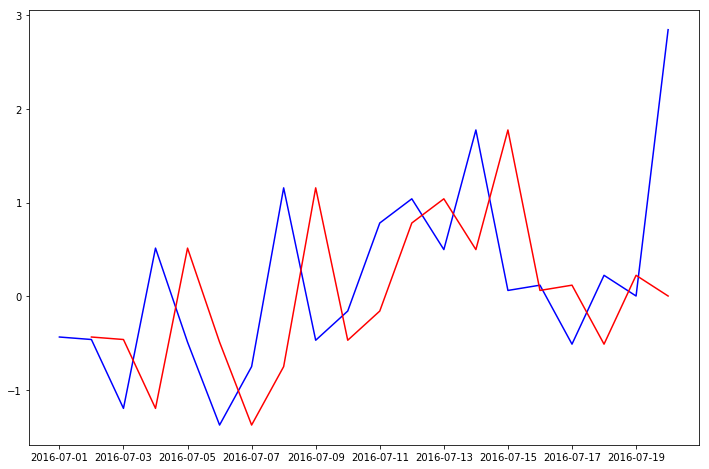

In [22]:
plt.figure(figsize=(12,8))
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [28]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

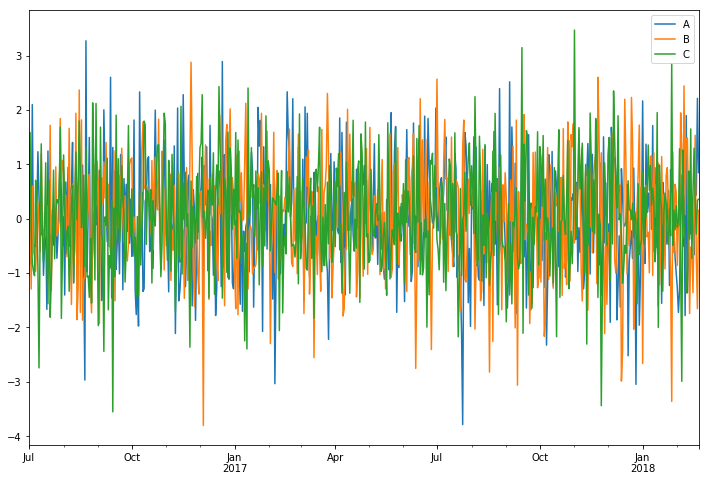

In [43]:
df.plot()

In [30]:
df.index

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10',
               ...
               '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
               '2018-02-19', '2018-02-20'],
              dtype='datetime64[ns]', length=600, freq='D')

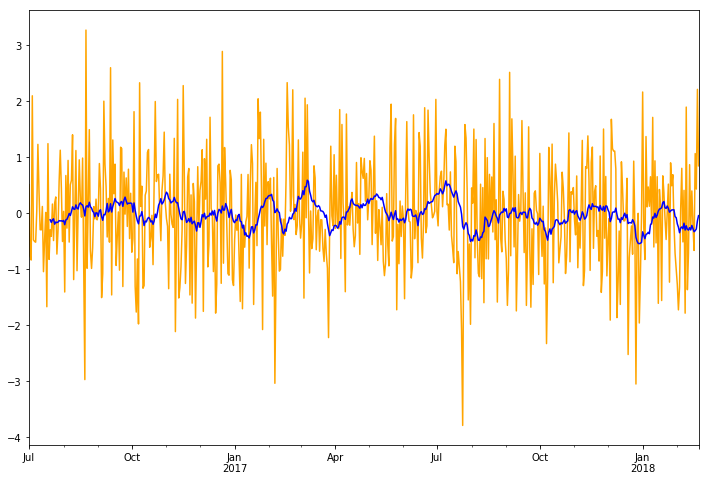

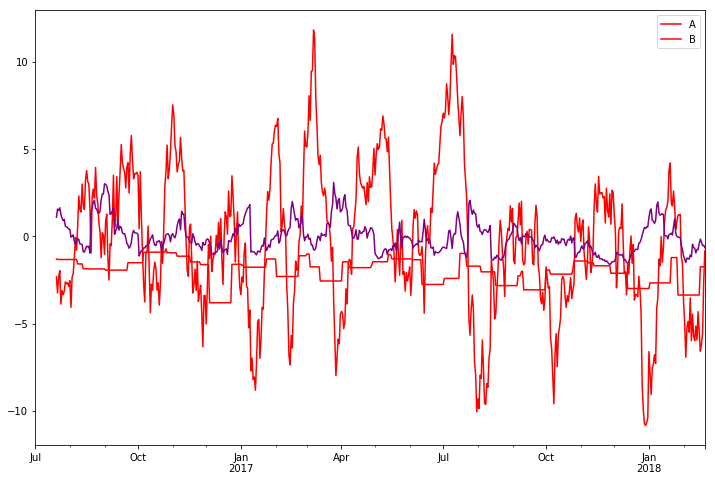

In [44]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 20)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df['A'].plot(color = 'orange')
r.mean()['A'].plot(color = 'blue')
r.agg({'A':'sum', 'B':'min'}).plot(color = 'red')
r.kurt()['A'].plot(color='purple')


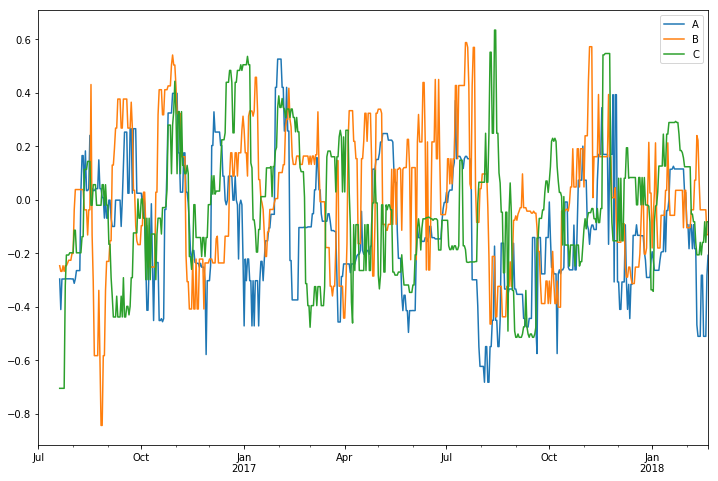

In [45]:
r.quantile(.5).plot()

In [47]:
#exponentially weighted
df.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()[1:10]

,A,B,C
2016-07-02,-0.168551,0.338772,0.356343
2016-07-03,-0.420611,-0.279890,0.151815
2016-07-04,0.340221,-0.013673,-0.140250
2016-07-05,0.131144,-0.164964,-0.350928
2016-07-06,-0.012452,-0.284998,-0.509332
2016-07-07,-0.116052,-0.425801,-0.259143
2016-07-08,-0.085096,-0.395665,-0.188955
2016-07-09,0.150077,-0.269945,-0.312126
2016-07-10,0.191003,-0.251403,-0.724590


In [48]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [49]:
df.head()

,A,B,C,D
2016-06-06,0.172317,0.967059,0.365992,0.793080
2016-06-07,0.441670,-1.180202,0.938643,0.439251
2016-06-08,-0.786648,-1.129345,-0.444124,-1.054658
2016-06-09,1.072060,-0.582369,2.361034,0.353505
2016-06-10,-1.487812,0.639365,-1.091613,0.872015


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000271CF5D78D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000271D0EA8080>], dtype=object)

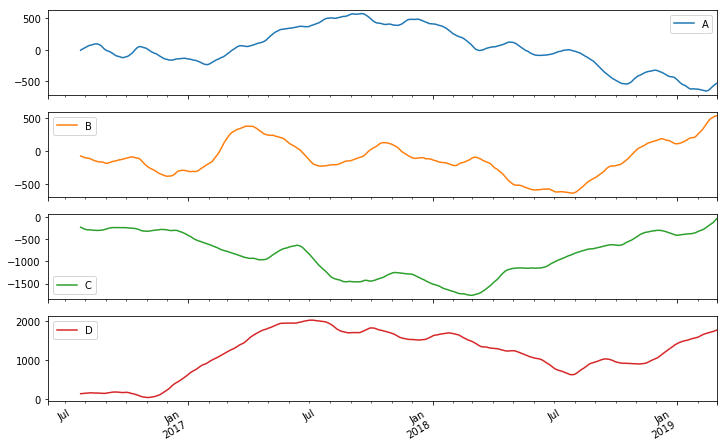

In [50]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [51]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.005603,0.731441,1.433871,0.528507


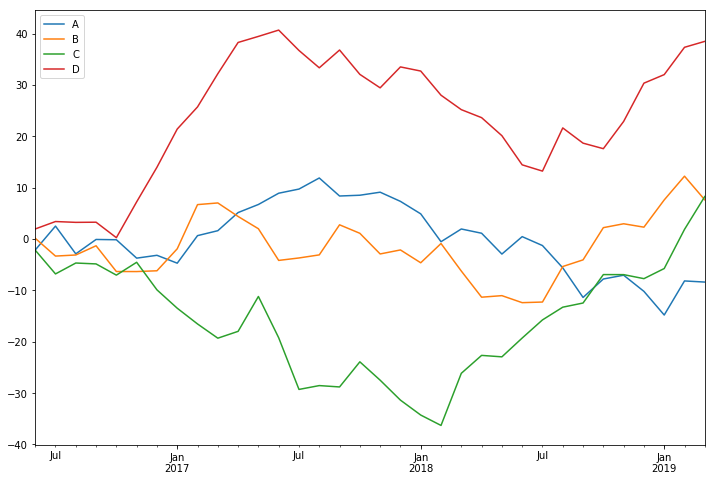

In [53]:
df.resample('M').mean().rolling(window = 1).mean().plot()

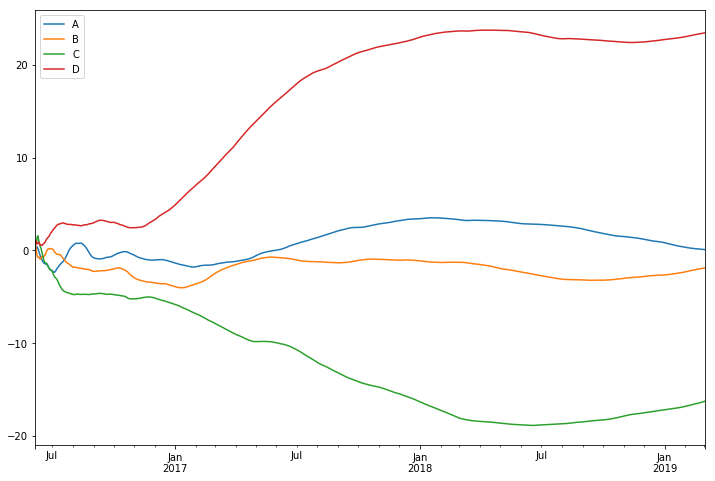

In [56]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean().plot()

In [58]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? --> 
# When might one vs. the other be appropriate? --> Use expanding when dealing with cumulative natured data (global temps, CO2 in atmosphere, etc.) 
# and use rolling for instances when only more recent data is relevant. In other words, rolling is for data that is weighted towards more recent
# and expanding for when all time points are weighted equally.